Files already downloaded and verified
Files already downloaded and verified
LR: 1e-05, Epoch [1/5], Loss: 4.5796
LR: 1e-05, Epoch [2/5], Loss: 4.4829
LR: 1e-05, Epoch [3/5], Loss: 4.3173
LR: 1e-05, Epoch [4/5], Loss: 4.1061
LR: 1e-05, Epoch [5/5], Loss: 3.8883
LR: 0.0001, Epoch [1/5], Loss: 3.9158
LR: 0.0001, Epoch [2/5], Loss: 2.4112
LR: 0.0001, Epoch [3/5], Loss: 1.8099
LR: 0.0001, Epoch [4/5], Loss: 1.5954
LR: 0.0001, Epoch [5/5], Loss: 1.4562
LR: 0.001, Epoch [1/5], Loss: 2.9529
LR: 0.001, Epoch [2/5], Loss: 2.0760
LR: 0.001, Epoch [3/5], Loss: 1.8344
LR: 0.001, Epoch [4/5], Loss: 1.7027
LR: 0.001, Epoch [5/5], Loss: 1.5939
LR: 0.01, Epoch [1/5], Loss: 4.0336
LR: 0.01, Epoch [2/5], Loss: 3.4709
LR: 0.01, Epoch [3/5], Loss: 3.1460
LR: 0.01, Epoch [4/5], Loss: 2.9488
LR: 0.01, Epoch [5/5], Loss: 2.8026
LR: 0.1, Epoch [1/5], Loss: 6.9664
LR: 0.1, Epoch [2/5], Loss: 6.2182
LR: 0.1, Epoch [3/5], Loss: 34.8335
LR: 0.1, Epoch [4/5], Loss: 8.3284
LR: 0.1, Epoch [5/5], Loss: 5.2352


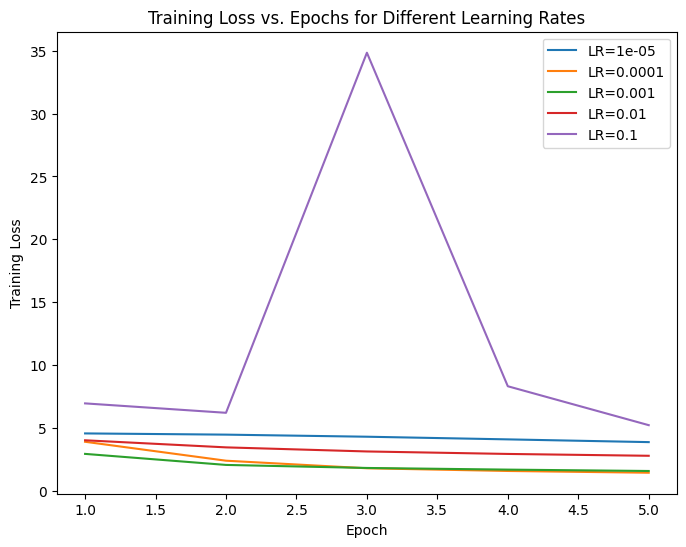

In [2]:
import torch
import timm
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
from timm.data import create_dataset, create_loader
from timm.data.transforms_factory import create_transform

# 1. Load CIFAR-100 dataset via timm's create_dataset
train_dataset = create_dataset('torch/cifar100', root='./data', download=True, split='train')
test_dataset = create_dataset('torch/cifar100', root='./data', download=True, split='validation')

# Define transformations and data loaders
transform = create_transform(input_size=224, is_training=True)
train_dataset.transform = transform
test_dataset.transform = create_transform(input_size=224, is_training=False)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Learning rates to test
learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
results = {}

# Define loss function
criterion = nn.CrossEntropyLoss()

for lr in learning_rates:
    # 2. Load the model for each learning rate and modify its architecture if needed
    model = timm.create_model('efficientvit_m5.r224_in1k', pretrained=True, num_classes=100)
    model.to(device)
    
    # Set up optimizer with current learning rate
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # 3. Train the model for a few epochs and track loss only
    num_epochs = 5  # Short training for comparison purposes
    train_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)  # Accumulate loss for the batch
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
        
        # Calculate and store average loss for this epoch
        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        
        print(f"LR: {lr}, Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Store the loss results for each learning rate
    results[lr] = train_losses

# 4. Plotting the results
plt.figure(figsize=(8, 6))

# Plot Training Loss
for lr, losses in results.items():
    plt.plot(range(1, num_epochs + 1), losses, label=f"LR={lr}")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Epochs for Different Learning Rates")
plt.legend()

plt.show()
